## Intro

In [2]:
from src.catching import attempt_catch
from src.pokemon import PokemonFactory, StatusEffect
import numpy as np
import json

factory = PokemonFactory("pokemon.json")

with open("pokemon.json", "r") as f:
    contenu = json.load(f)


    

# Ejercicio 1.A

Probabilidad usando una pokeball:
- jolteon: 0.04
- caterpie: 0.33
- snorlax: 0.04
- onix: 0.05
- mewtwo: 0.0
Probabilidad usando una ultraball:
- jolteon: 0.05
- caterpie: 0.68
- snorlax: 0.09
- onix: 0.14
- mewtwo: 0.0
Probabilidad usando una fastball:
- jolteon: 0.27
- caterpie: 0.36
- snorlax: 0.02
- onix: 0.08
- mewtwo: 0.02
Probabilidad usando una heavyball:
- jolteon: 0.04
- caterpie: 0.26
- snorlax: 0.1
- onix: 0.12
- mewtwo: 0.0


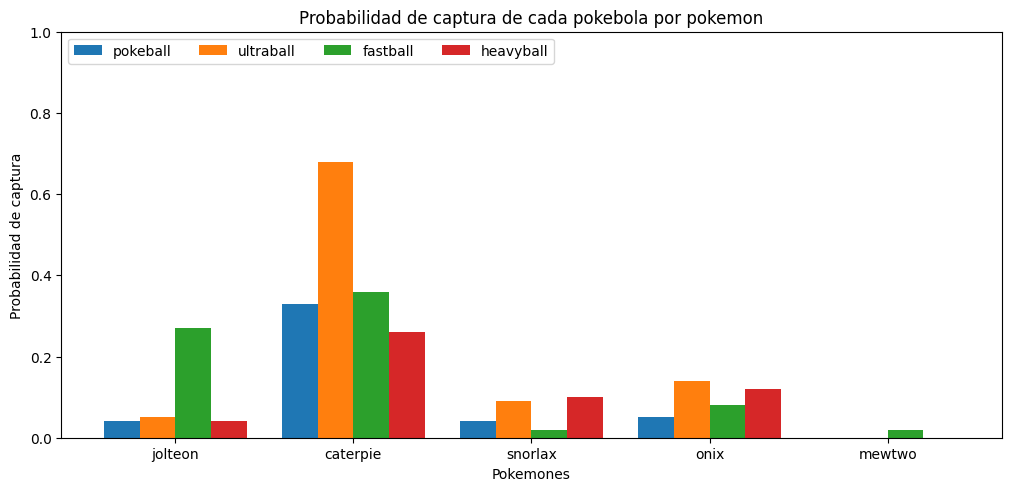

In [3]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(layout='constrained')
pokeballs = ["pokeball", "ultraball", "fastball", "heavyball"]
fig.set_figwidth(10)

x = np.arange(len(contenu.keys()))  # the label locations
width = 0.2  # the width of the bars
multiplier = -0.5
catch_rate = {}

for j in pokeballs:
    print('Probabilidad usando una ' + j + ':')
    averages = []
    for key in contenu.keys():
        if not key in catch_rate:
            catch_rate[key] = {}
        pokemon = factory.create(key, 100, StatusEffect.NONE, 1)
        results = []
        for i in range(100):
            value = attempt_catch(pokemon, j)
            results.append(value[0])
        mean_val = np.mean(results)
        catch_rate[key][j] = mean_val
        print('- ' + key + ':', mean_val)
        averages.append(mean_val)
    offset = width * multiplier
    bar = ax.bar(x + offset, averages, width, label=j)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Probabilidad de captura')
ax.set_xlabel('Pokemones')
ax.set_title('Probabilidad de captura de cada pokebola por pokemon')
ax.set_xticks(x + width, contenu.keys())
ax.legend(loc='upper left', ncols=4)
ax.set_ylim(0, 1)

plt.show()
        

# Ejercicio 1.B

Como se puede observar en el gráfico anterior, las probabilidades de captura de tanto la pokeball como la ultraball tienen un comportamiento parecido en cada pokemón, donde la pokeball tiene una probabilidad base y la de la ultraball es de aproximadamente el doble que la anterior.

Sin embargo, en el caso de la fastball se observa una variación en su probabilidad con respecto al de una pokeball en un mismo pokemón, donde, por ejemplo, para Jolteon esta probabilidad es mayor que la de una pokeball aunque con una proporción variable, mientras que para Snorlax es de la misma magnitud que la pokeball mencionada. Esto mismo se observa también con la heavyball pero a la inversa, ya que Snorlax tiene casi una mayor probabilidad de captura en una heavyball con respecto a una pokeball, mientras que en Jolteon es la misma.

Por otro lado se encuentra Caterpie, cuyas probabilidades de captura con la fastball y heavyball son de la misma magnitud que una pokeball.

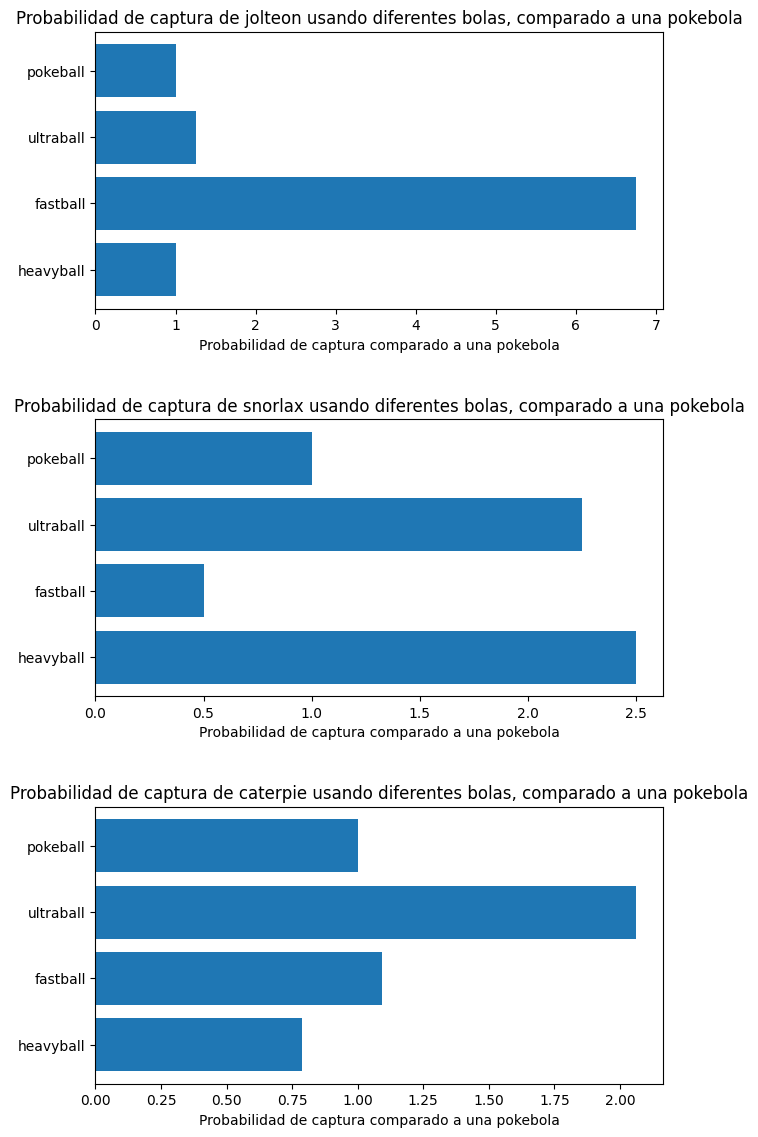

In [4]:
# Este código usa los resultados del ejercicio 1.A como datos base, por lo que
# se debe ejecutar dicho código antes de correr este

import matplotlib.pyplot as plt

fig, ax = plt.subplots(3, 1)
fig.tight_layout()
fig.set_figheight(12)

pokemons = ['jolteon', 'snorlax', 'caterpie']
y = np.arange(len(pokeballs))
i = 0

for pokemon in pokemons:
    catches = []
    
    for pokeball in catch_rate[pokemon].keys():
        catches.append(catch_rate[pokemon][pokeball] / catch_rate[pokemon]['pokeball'])
    
    ax[i].barh(y, catches, align='center')
    ax[i].set_yticks(y, labels=pokeballs)
    ax[i].invert_yaxis()
    ax[i].set_xlabel('Probabilidad de captura comparado a una pokebola')
    ax[i].set_title('Probabilidad de captura de {} usando diferentes bolas, comparado a una pokebola'.format(pokemon))
    i += 1


Luego, realizando una instrospección de las propiedades de cada pokemón, vemos una variación en los atributos de cada uno, pero las mayores son las de velicodad y peso, donde:

- Jolteon tiene una velocidad de **130** comparado a Snorlax que tiene 30 y Caterpie que tiene 45
- Snorlax tiene un peso de **1014.1**, mientras que Jolteon tiene 54 y Caterpie tiene 6.4

Por último, a nivel código encontramos que dichas propiedades **SÍ** afectan a la probabilidad de captura de cada pokemón, donde:

- Usando una _fastball_, los pokemons con velocidad >= 100 tienen una probabilidad 4 veces mayor de ser capturados en cada intento, comparado a una pokeball. Esto evidencia el aumento de probabilidades de captura de Jolteon usando una fastball.

```java
    # Posibilidad de captura de una Fastball
    def catch_rate(self):
        modifier = 1
        if self._catching_pkmn.stats.speed >= 100:
            modifier = 4
        return modifier * self._catching_pkmn.catch_rate
```

- Al usar una _heavyball_, los pokemons tienen mayor probabilidad de captura dependiendo del peso del pokemon, organizandolos en categorías. En el caso de Snorlax, vemos que se encuentra en la categoría superior, donde la probabilidad de captura en cada intento es **cuarenta** veces superior a la de una pokeball, mientras que Jolteon y Caterpie poseen pesos que no tienen modificador alguno en dicha probabilidad.

```java 
    # Posiblidad de captura de una Heavyball
    def catch_rate(self):
        modifier = -20
        if self._catching_pkmn.weight > 451.5:
            modifier = 20
        if self._catching_pkmn.weight > 677.3:
            modifier = 30
        if self._catching_pkmn.weight > 903:
            modifier = 40
            
        catch_rate = self._catching_pkmn.catch_rate + modifier
        return catch_rate if catch_rate > 0 else 1
```

Por último, merece mención el caso de Mewtwo, donde su velocidad es de 130 al igual que Jolteon y se puede apreciar cierto incremento de su probabilidad de captura en el gráfico del ejercicio 1.A, pero al tener una probabilidad de captura demasiado baja para poder ser analizada dado el tamaño de muestra usado (100 tiradas), se decidió excluirlo del análisis.

# Ejercicio 2.A

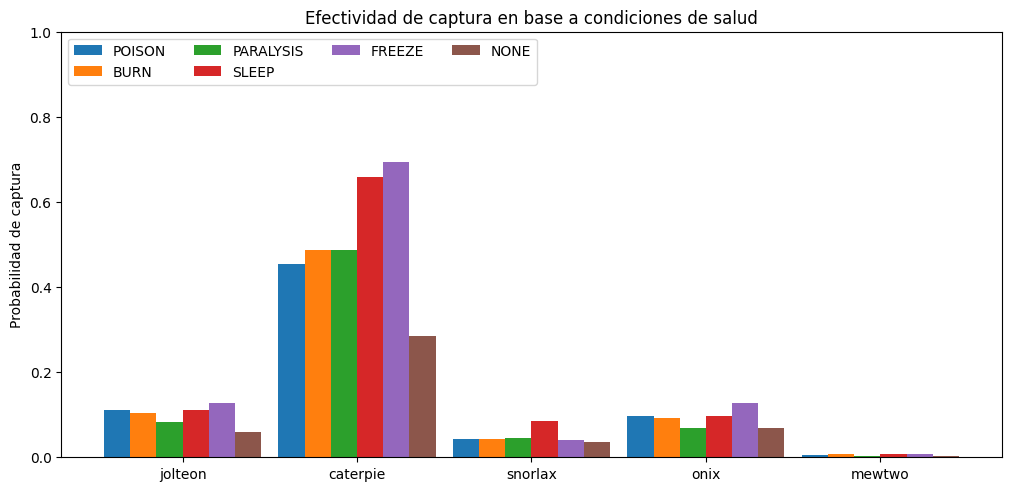

In [51]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(layout='constrained')
fig.set_figwidth(10)
pokeballs = ["pokeball", "ultraball", "fastball", "heavyball"]

x = np.arange(len(contenu.keys()))  # the label locations
width = 0.15  # the width of the bars
multiplier = -1.5

for j in StatusEffect:
    averages = []
    for key in contenu.keys():
        pokemon = factory.create(key, 100, j, 1)
        results = []
        for i in range(500):
            value = attempt_catch(pokemon, "pokeball")
            results.append(value[0])
        averages.append(np.mean(results))
    offset = width * multiplier
    bar = ax.bar(x + offset, averages, width, label=j.name)
    # ax.bar_label(bar, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Probabilidad de captura')
ax.set_title('Efectividad de captura en base a condiciones de salud')
ax.set_xticks(x + width, contenu.keys())
ax.legend(loc='upper left', ncols=4)
ax.set_ylim(0, 1)

plt.show() 

Si, se analiza la captura con pokeballs y el porcentaje de captura es considerablemente mayor cuando los pokemones estan afectados por un estado o condicion de salud. Las condiciones mas efectivas son SLEEP Y FREEZE. Comparando con el grafico anterior se puede notar el doble de efectividad. 

# Ejercicio 2B

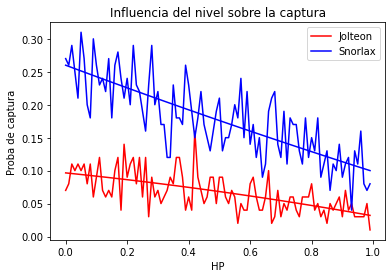

In [16]:
meanssnorlax=[]
meansjolteon=[]
HP=np.arange(0,1,0.01)
for i in HP:
    pokemon = factory.create("snorlax", 100, StatusEffect.NONE, i)
    results = []
    for j in range(100):
        value = attempt_catch(pokemon, "heavyball")
        results.append(value[0])
    average = np.count_nonzero(results)/len(results)
    meanssnorlax.append(average)
for i in HP:
    pokemon = factory.create("jolteon", 100, StatusEffect.NONE, i)
    results = []
    for j in range(100):
        value = attempt_catch(pokemon, "heavyball")
        results.append(value[0])
    average = np.count_nonzero(results)/len(results)
    meansjolteon.append(average)
plt.plot(HP,meansjolteon, label='Jolteon',color='red')
coefficients = np.polyfit(HP,meansjolteon, 2)
polynomial = np.poly1d(coefficients)
plt.plot(HP,polynomial(HP),color='red')
plt.plot(HP,meanssnorlax, label='Snorlax',color='blue')
coefficientssnorlax = np.polyfit(HP,meanssnorlax, 2)
polynomialsnorlax = np.poly1d(coefficientssnorlax)
plt.plot(HP,polynomialsnorlax(HP),color='blue')
plt.title('Influencia del nivel sobre la captura')
plt.legend()
plt.xlabel('HP')
plt.ylabel('Proba de captura')
plt.show()

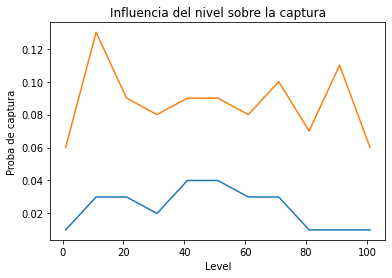

In [17]:
meanssnorlax=[]
meansjolteon=[]
level=np.arange(1,110,10)
for i in level:
    pokemon = factory.create("snorlax", i, StatusEffect.NONE, 1)
    results = []
    for j in range(100):
        value = attempt_catch(pokemon, "heavyball")
        results.append(value[0])
    average = np.count_nonzero(results)/len(results)
    meanssnorlax.append(average)
for i in level:
    pokemon = factory.create("jolteon", i, StatusEffect.NONE, 1)
    results = []
    for j in range(100):
        value = attempt_catch(pokemon, "heavyball")
        results.append(value[0])
    average = np.count_nonzero(results)/len(results)
    meansjolteon.append(average)
plt.plot(level,meansjolteon, label='Jolteon')
plt.plot(level,meanssnorlax, label='Snorlax')
plt.title('Influencia del nivel sobre la captura')
plt.xlabel('Level')
plt.ylabel('Proba de captura')
plt.show()

# Ejercicio 2.D

Como se vio en los ítems anteriores, la elección de un tipo de pokebola y condición del pokemón a capturar influyen en la probabilidad final de captura de dicho pokemón. Por ello, usando a Jolteon y Snorlax como ejemplos, se procede a analizar la mejor combinación posible en cada caso.

**NOTA:** A fines de aumentar la consistencia de los resultados obtenidos, en este ejercicio se usa la probabilidad de capturar cada pokemón en vez de obtener un estimado luego de _N_ tiradas.

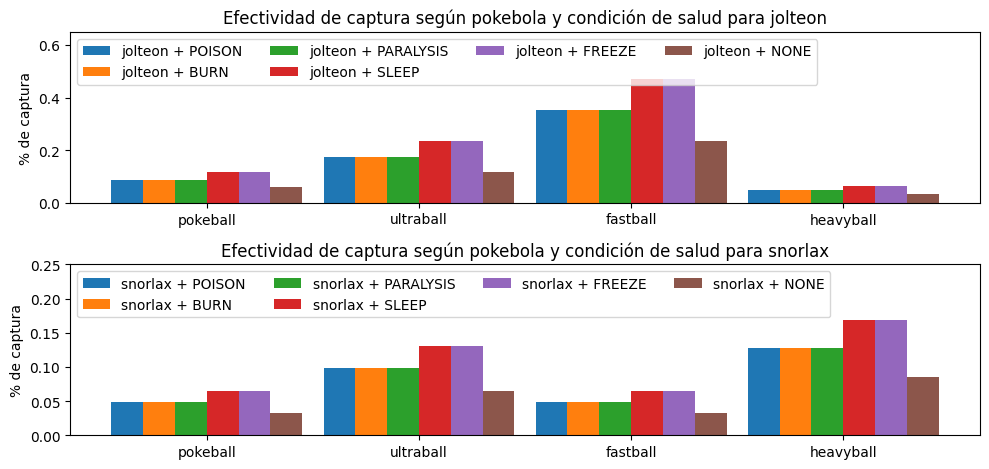

In [11]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, layout='tight')
fig.set_figwidth(10)
pokeballs = ['pokeball', 'ultraball', 'fastball', 'heavyball']
pokemons = ['jolteon', 'snorlax']

x = np.arange(len(pokeballs))  # the label locations
width = 0.15  # the width of the bars
i = 0

for pokemon in pokemons:
    multiplier = -1.5
    catches = {}
    for j in StatusEffect:
        aux_poke = factory.create(pokemon, 100, j, 1)
        catches[j] = {}
        for pokeball in pokeballs:
            catch_rate = attempt_catch(aux_poke, pokeball)[1]
            catches[j][pokeball] = catch_rate
        offset = width * multiplier
        bar = ax[i].bar(x + offset, catches[j].values(), width, label='{} + {}'.format(pokemon, j.name))
        # ax.bar_label(bar, padding=3)
        multiplier += 1
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax[i].set_ylabel('% de captura')
    ax[i].set_title('Efectividad de captura según pokebola y condición de salud para {}'.format(pokemon))
    ax[i].set_xticks(x + width, pokeballs)
    ax[i].legend(loc='upper left', ncols=4)
    if i == 0:
        y_lim = 0.65
    else:
        y_lim = 0.25
    ax[i].set_ylim(0, y_lim)
    i += 1

plt.show()

Así, se puede observar que:
| Pokemón\Combinación | Mejor combinación | Peor combinación |
| ------------------- | ----------------- | ---------------- |
| Jolteon | Fastball + SLEEP/FREEZE | Heavyball + NONE |
| Snorlax | Heavyball + SLEEP/FREEZE | Pokeball/Fastball + NONE |